# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import os
os.getcwd()
import os
os.listdir("../../data")


['all.txt',
 '.DS_Store',
 'clean_corpus.txt',
 'txt',
 'all.all_1949txt',
 'newspapers.model',
 'rtbf_20251017.csv',
 'all_1949.txt',
 'rtbf_20251018.csv',
 'sents.txt',
 'all_(year).txt',
 'word2vec_model_2.model.wv.vectors.npy',
 'word2vec_model_2.model',
 'txt_tp4',
 'db',
 'word2vec_model_2.model.syn1neg.npy',
 'camille_20251019.csv',
 'tmp',
 'word2vec_model_1.model',
 'camille_20251018.csv',
 'tmp_wordclouds',
 'rtbf_example.txt',
 'word2vec_model_3.model']

In [8]:
import os

# Chemin vers ton fichier unique
path = "../../data/clean_corpus.txt"

# Lire le corpus entier
with open(path, "r", encoding="utf-8") as f:
    full_text = f.read()

print("Longueur du corpus :", len(full_text), "caractères")




import os

clean_corpus = {}

folder = "../../data/corpus_clean/"   # ou ton dossier

for filename in os.listdir(folder):
    if filename.endswith(".txt"):
        with open(os.path.join(folder, filename), "r", encoding="utf-8") as f:
            clean_corpus[filename] = f.read()


Longueur du corpus : 17770352 caractères


FileNotFoundError: [Errno 2] No such file or directory: '../../data/corpus_clean/'

In [2]:
# Fusionner tous les textes du corpus nettoyé en un seul string
full_text = " ".join(clean_corpus.values())


NameError: name 'clean_corpus' is not defined

## Créer une une liste de stopwords

In [2]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [4]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [5]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

25474081 words found


In [6]:
words[:10]

['mi', 'imnri', 'r', 'i', '«', 'i', 'i', 'HMU', "'", 'î']

## Calculer la taille du vocabulaire

In [7]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

8570422 words kept (959957 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [8]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('rue', 82158),
 ('dem', 46951),
 ('bruxelles', 33218),
 ('rossel', 30597),
 ('prix', 23711),
 ('maison', 21579),
 ('ans', 21185),
 ('tél', 20085),
 ('bon', 17723),
 ('très', 17228)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

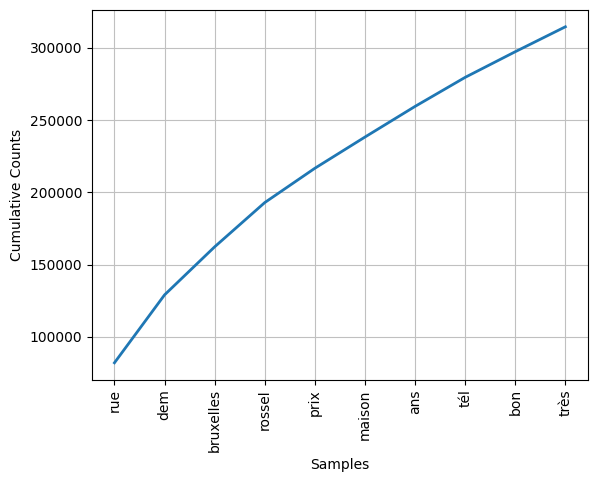

In [9]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [10]:
fdist.hapaxes()[:30]

['imnri',
 'vaain',
 'téicj',
 'îichakdui',
 'iallsènas',
 'îdto',
 'vachei',
 'ilashtya',
 'innlrov',
 'xumiir',
 'epautre',
 'lioumon',
 'ivellom',
 'inint',
 'uect',
 'iiaetolurï',
 'wacrofiliom',
 'charmanne',
 'slrails',
 'seluements',
 'kelels',
 'goringy',
 'deyloo',
 'vannéste',
 'iïoeeke',
 'glaboke',
 'couturîèaux',
 'lucion',
 'ilédo',
 'iloudmont']

## Trouver les mots les plus longs du corpus

In [11]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['llllllllllllllllllllllllllllillllllllllllllllllllllllllllllllllllllllllllillllllllllllllllllllllllllllllllllllllllllllillllllllllilllllllllllllllllllllllllillllllllllllllllllllllllllllllllllllllllllllllllllillllllllllllh',
 'liiiiiitilliiiniiiliiiiïltlillïllilhlililfiiilliiiliiiiiiiitiliiiiiiiiiiiiiiitiiiiiiiifiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiitiiiiiiiiiininillilliiiiiiiiiiiritiiiiimsiiiiiuiniiiiitnttilmhitlihiiiiiiiiiiii',
 'llllllllllllllllllllilllllllllllllllllllllillllllllilllllllllllllllllllllllllllllllllllllllllifillllllllllllllllllllllllllllfllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllfllllllil',
 'lllllllllllllllllllllillllllllllllllllllllllillllllllllllllilllllllllllllllllllllllllllllllllllllllllniiiiiiiiiiiiiiiiiiiiiinilllllllllllllllllllllllllllllllllhiiiiiniilllllllll',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiifiiiiiiiiifiiiiiiiiiiiiiiiiiiiiiiiiiiiiniiiiiiij',
 'it